In [23]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjus the config of the plots created


#Read the data

df = pd.read_csv(r'C:\Users\Ruben\Downloads\movies.csv')

In [31]:
#Allow you to scroll throught the data
pd.set_option('display.max_rows', None)

#drop nule values
df = df.dropna()

# Confirming if there is still any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'. format(col, pct_missing))
    
#Remove any duplicates

df = df.drop_duplicates()

df.head()

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
correctyear - 0.0%


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


In [25]:
# Look into the data type in the col

df.dtypes

#changing the data type on the col

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

#Create year col that matches the released year

df['correctyear'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

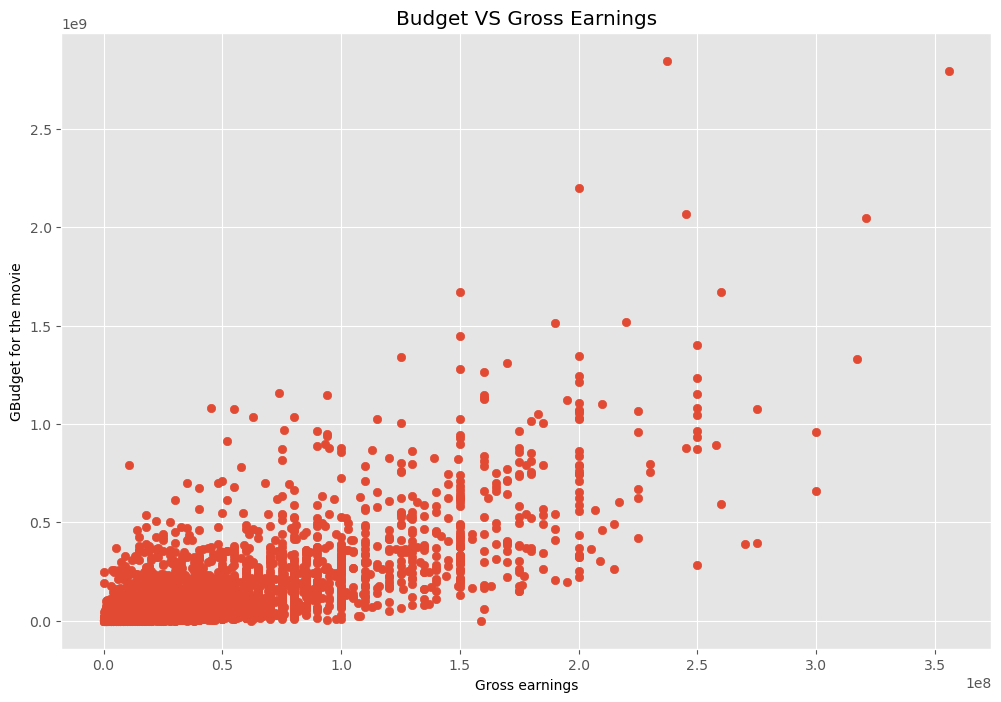

In [26]:
#order the data by gross DESC

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

#Create a scater plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title ('Budget VS Gross Earnings')

plt.xlabel('Gross earnings')

plt.ylabel('GBudget for the movie')

plt.show()



<Axes: xlabel='budget', ylabel='gross'>

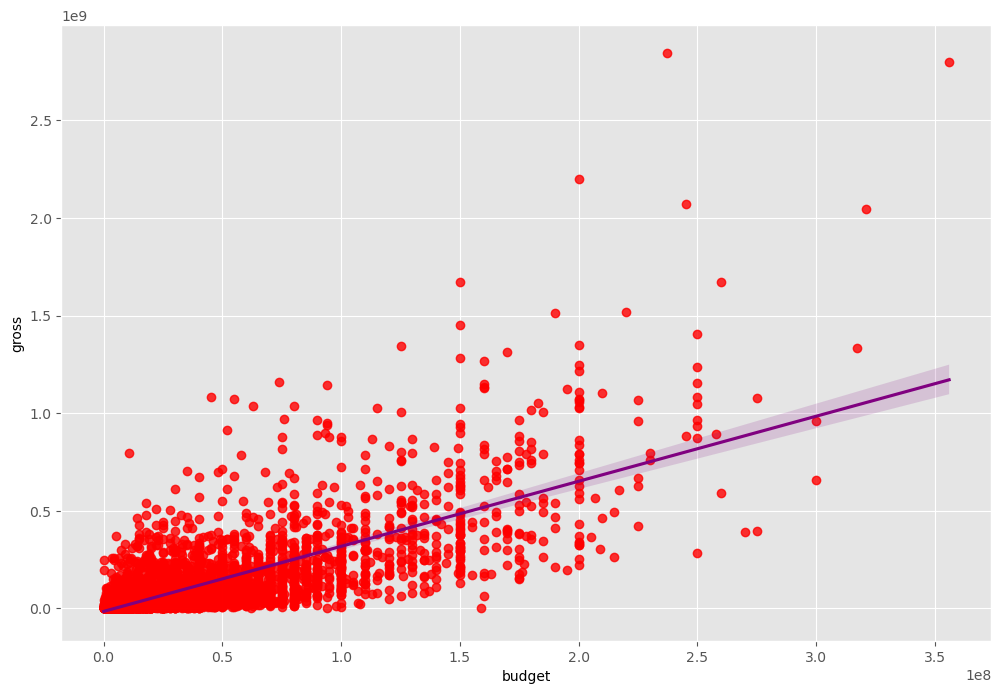

In [27]:
#Checking the correlation using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws= {"color": "red"}, line_kws={"color": "purple"})

C:\Users\Ruben\AppData\Local\Temp\ipykernel_46284\1143065371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


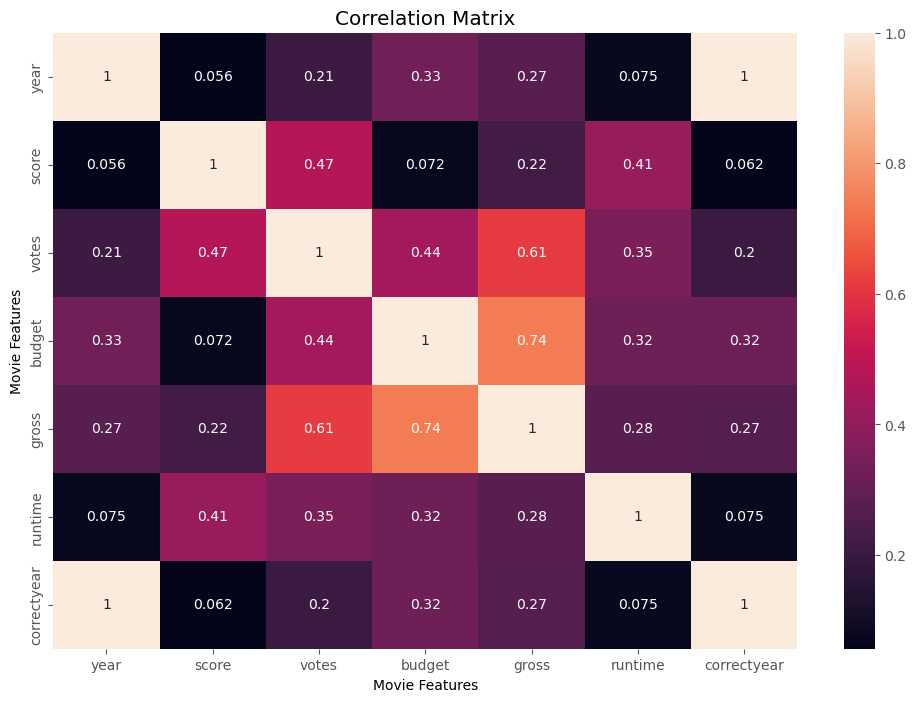

In [28]:
#Visualize correlation
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title ('Correlation Matrix')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

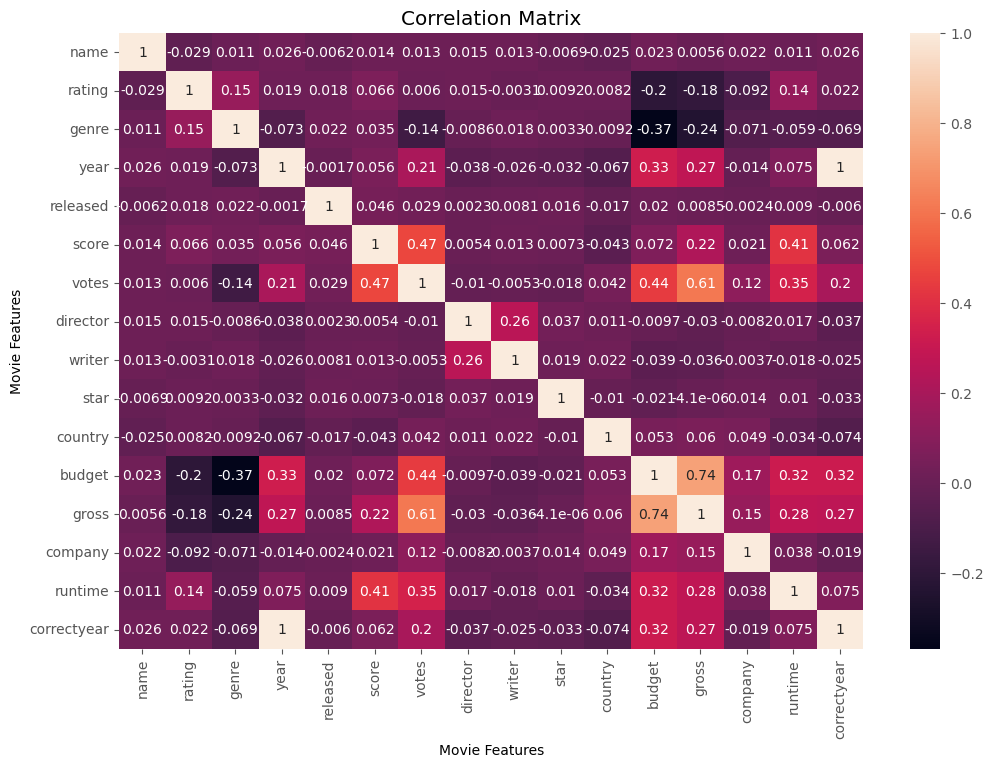

In [29]:
#Changing the data from object to numeric values to be able to look into correlation

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

#looking into correlation of all the data using heatmap

correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title ('Correlation Matrix')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [30]:
#Looking at the correlation but in a list 

corr_pair = correlation_matrix.unstack()

sorted_pair = corr_pair.sort_values()

#looking at only high corr

high_corr = sorted_pair[(sorted_pair) > 0.5]

high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         correctyear    0.998726
correctyear  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64